# 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importing Data Files

In [22]:
movies=pd.read_csv('data/movie.csv')
ratings=pd.read_csv('data/rating.csv')
genome_scores=pd.read_csv('data/genome_scores.csv')
genome_tags=pd.read_csv('data/genome_tags.csv')
tags=pd.read_csv('data/tag.csv')

# 3. Data Pre-Analysis

## Ratings 

In [3]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


#### Rating Distribution

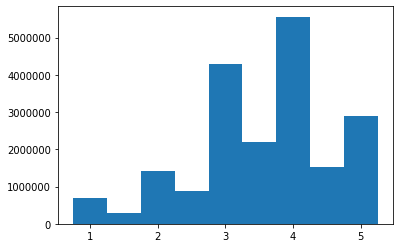

In [6]:
plt.hist(ratings['rating'], bins=[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25])
plt.show()

#### Count of userId

In [8]:
np.unique(ratings['userId']).shape[0]

138493

#### Count of movieId

In [10]:
np.unique(ratings['movieId']).shape[0]

26744

## Movies

In [11]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


#### Refining Movies in more organised way

In [12]:
movies_refine = movies.copy()
movies_refine['year'] = ((movies_refine['title'].str.extract(r'\((....)\) *$'))[0].astype('float32'))
movies_refine = movies_refine.dropna()
movies_refine['year'] = movies_refine['year'].astype('int32')
movies_refine['title'] = (movies_refine['title'].str.extract(r'^(.*) \(....\) *$'))[0]
movies_refine['genres'] = movies_refine['genres'].str.split('|')

movies_refine

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben,[Comedy],2007
27274,131256,"Feuer, Eis & Dosenbier",[Comedy],2002
27275,131258,The Pirates,[Adventure],2014
27276,131260,Rentun Ruusu,[(no genres listed)],2001


#### Movie distribution on years

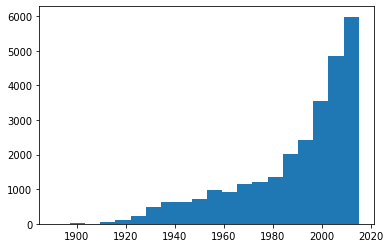

In [14]:
plt.hist(movies_refine.year, bins=20)
plt.show()

#### Count of genres

In [17]:
genre_count = dict()
for index, series in movies_refine.iterrows():
    for genre in series['genres']:
        genre_count[genre] = genre_count.get(genre, 0) + 1
print(genre_count)

{'Adventure': 2329, 'Animation': 1026, 'Children': 1139, 'Comedy': 8369, 'Fantasy': 1411, 'Romance': 4127, 'Drama': 13337, 'Action': 3518, 'Crime': 2938, 'Thriller': 4177, 'Horror': 2611, 'Mystery': 1513, 'Sci-Fi': 1740, 'IMAX': 196, 'Documentary': 2467, 'War': 1194, 'Musical': 1034, 'Western': 676, 'Film-Noir': 330, '(no genres listed)': 237}


#### Kinds of genres

In [18]:
len(genre_count)

20

## Genome (Score & Tags)

In [23]:
genome=genome_scores.merge(genome_tags, how='left')
genome

,movieId,tagId,relevance,tag
0,1,1,0.02500,007
1,1,2,0.02500,007 (series)
2,1,3,0.05775,18th century
3,1,4,0.09675,1920s
4,1,5,0.14675,1930s
...,...,...,...,...
11709763,131170,1124,0.58775,writing
11709764,131170,1125,0.01075,wuxia
11709765,131170,1126,0.01575,wwii
11709766,131170,1127,0.11450,zombie


#### Genome tag relevance distribution

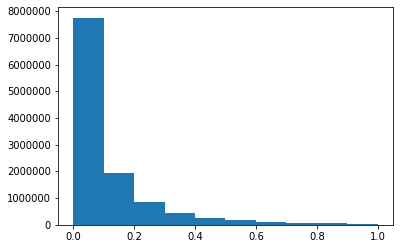

In [25]:
plt.hist(genome['relevance'])
plt.show()

# 4. Working On Data

In [26]:
# Getting total no of Users who are more than 200 times in ratings data
a=ratings['userId'].value_counts()
b=ratings['userId'].value_counts()>200
users=list(a[b].index)
len(users)

26599

In [27]:
# Removing Users who are less than 200 times
ratings=ratings[ratings['userId'].isin(users)]

In [28]:
# Merging Ratings data with movies_refine data
ratings_with_moviename=ratings.merge(movies_refine, on='movieId')

In [29]:
# Grouping Movies
movie_num_rating=ratings_with_moviename.groupby('title')['rating'].count().reset_index()

In [30]:
# Renaming a column
movie_num_rating.rename(columns={'rating':'num_ratings'},inplace=True)

In [31]:
# Filtering
movie_num_rating=movie_num_rating[movie_num_rating['num_ratings']>=50]

In [32]:
# Merging
final_rating=ratings_with_moviename.merge(movie_num_rating,on='title')

In [33]:
# Removing Duplicates
final_rating=final_rating.drop_duplicates(subset=['userId','title'])

In [34]:
# Making Pivot Table
movie_pivot=final_rating.pivot_table(columns='userId',index='title',values='rating')

In [35]:
# Replacing 'NA' places with '0'
movie_pivot=movie_pivot.fillna(0)

In [36]:
# Making Matrix Of Pivot Table
from scipy.sparse import csr_matrix
movie_matrix=csr_matrix(movie_pivot)
movie_matrix

<9777x26599 sparse matrix of type '<class 'numpy.float64'>'
	with 12215635 stored elements in Compressed Sparse Row format>

In [37]:
# Importing Algorithm
from sklearn.neighbors import NearestNeighbors

In [38]:
model=NearestNeighbors(algorithm='brute')

In [39]:
# Training Model
model.fit(movie_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [40]:
def recommend(moviename):
    b_id=np.where(movie_pivot.index==moviename)[0][0]
    distance,suggestion=model.kneighbors(movie_pivot.iloc[b_id,:].values.reshape(1,-1),n_neighbors=5)
    for i in suggestion[0]:
        print(movie_pivot.index[i])

In [41]:
recommend('The Pumaman')

The Pumaman
Horrors of Spider Island (Ein Toter Hing im Netz)
Giant Spider Invasion, The
Mitchell
Beast of Yucca Flats, The
